In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8,5)


In [ ]:
df = pd.read_csv('../data/gurgaon_properties_missing_value_treated.csv')

In [4]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,dlf the skycourt,sector 86,1.58,8191.0,3,3,1,16.0,Relatively New,1750.0,0,0,0,1,0,2,152
1,flat,ss the leaf,sector 85,1.20,7317.0,2,2,3,12.0,Relatively New,1484.0,0,0,0,0,0,2,157
2,house,ansals florence villa,sector 57,6.00,22222.0,4,5,2,2.0,Old Property,2700.0,0,1,0,1,0,2,20
3,flat,vatika the seven lamps,sector 82,0.86,6022.0,2,2,2,12.0,Relatively New,1294.0,1,0,0,0,0,2,135
4,house,independent,sector 7,0.45,5000.0,3,2,1,2.0,Old Property,900.0,0,0,0,0,1,0,12


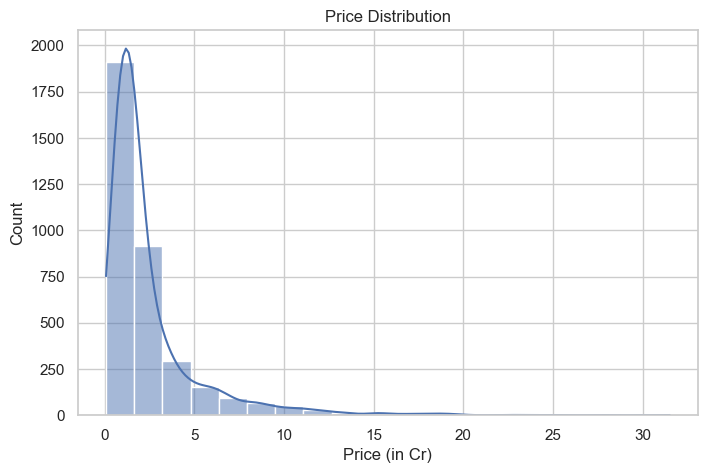

In [6]:
sns.histplot(df['price'], bins=20, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price (in Cr)")
plt.ylabel("Count")
plt.show()


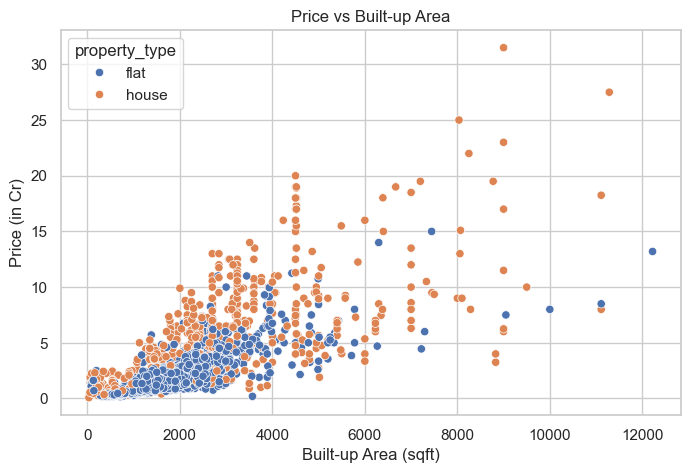

In [7]:
sns.scatterplot(data=df, x='built_up_area', y='price', hue='property_type')
plt.title("Price vs Built-up Area")
plt.xlabel("Built-up Area (sqft)")
plt.ylabel("Price (in Cr)")
plt.show()


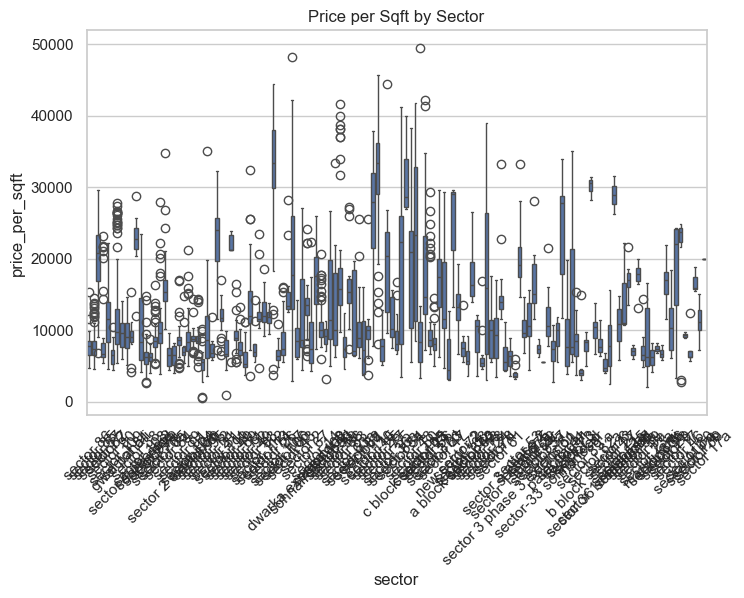

In [8]:
sns.boxplot(data=df, x='sector', y='price_per_sqft')
plt.title("Price per Sqft by Sector")
plt.xticks(rotation=45)
plt.show()


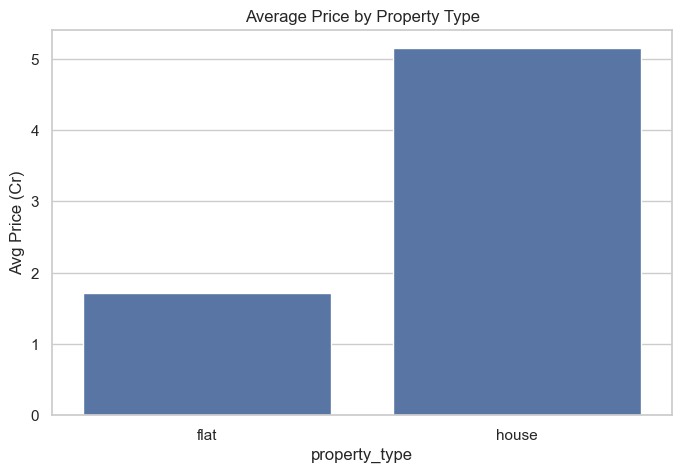

In [9]:
avg_price = df.groupby('property_type')['price'].mean().reset_index()

sns.barplot(data=avg_price, x='property_type', y='price')
plt.title("Average Price by Property Type")
plt.ylabel("Avg Price (Cr)")
plt.show()


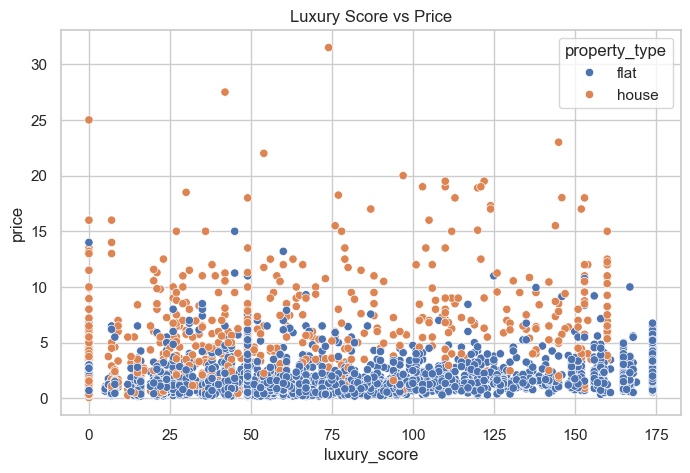

In [10]:
sns.scatterplot(data=df, x='luxury_score', y='price', hue='property_type')
plt.title("Luxury Score vs Price")
plt.show()


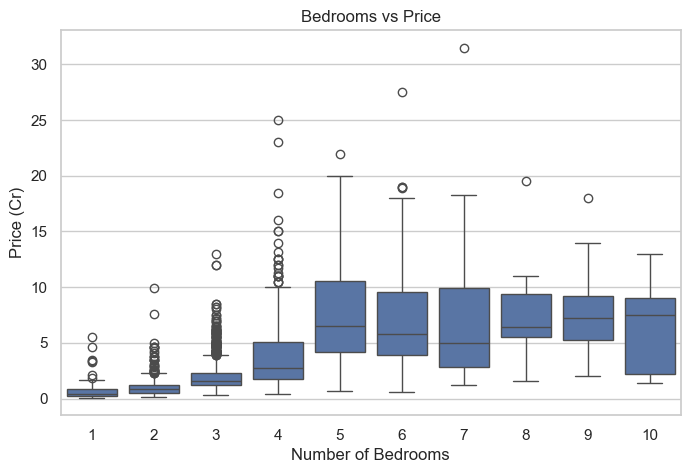

In [11]:
sns.boxplot(data=df, x='bedRoom', y='price')
plt.title("Bedrooms vs Price")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Price (Cr)")
plt.show()


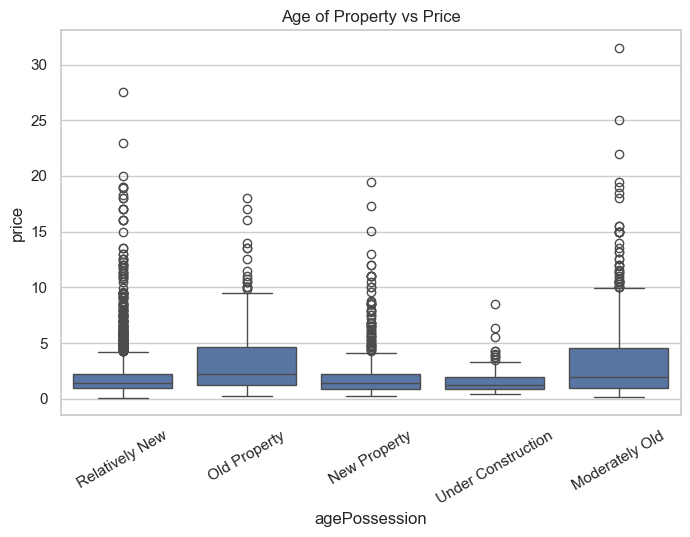

In [12]:
sns.boxplot(data=df, x='agePossession', y='price')
plt.title("Age of Property vs Price")
plt.xticks(rotation=30)
plt.show()


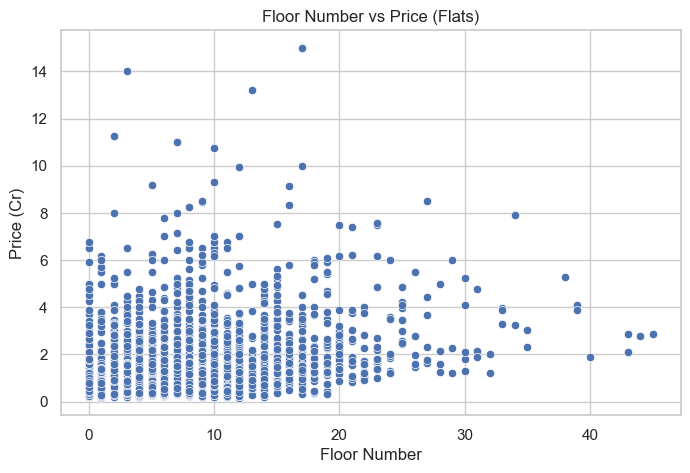

In [13]:
flats = df[df['property_type'] == 'flat']

sns.scatterplot(data=flats, x='floorNum', y='price')
plt.title("Floor Number vs Price (Flats)")
plt.xlabel("Floor Number")
plt.ylabel("Price (Cr)")
plt.show()


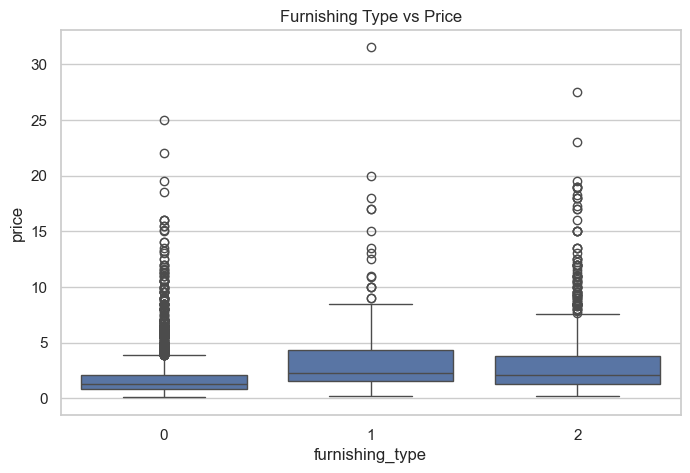

In [15]:
sns.boxplot(data=df, x='furnishing_type', y='price')
plt.title("Furnishing Type vs Price")
plt.show()


In [17]:
amenity_cols = ['study room','servant room','store room','pooja room','others']
df['amenity_count'] = df[amenity_cols].sum(axis=1)


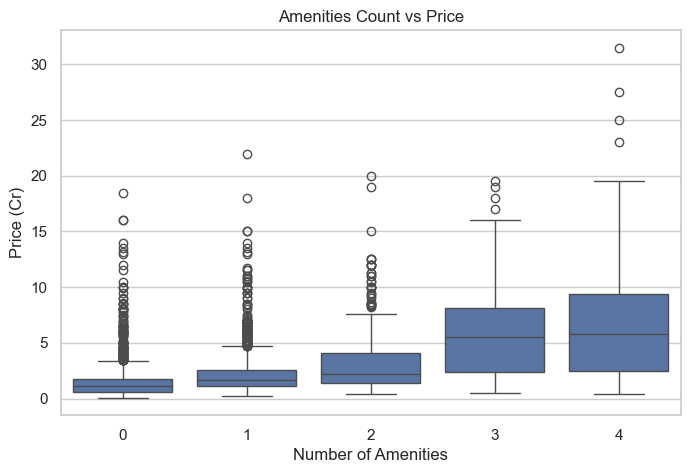

In [18]:
sns.boxplot(data=df, x='amenity_count', y='price')
plt.title("Amenities Count vs Price")
plt.xlabel("Number of Amenities")
plt.ylabel("Price (Cr)")
plt.show()


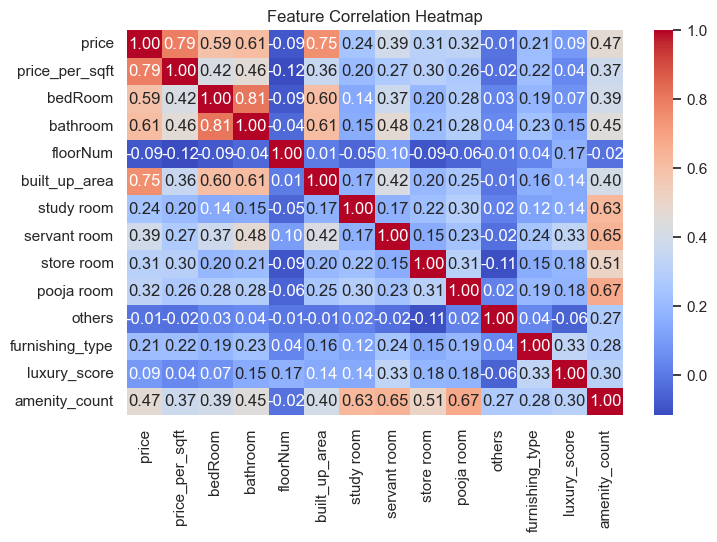

In [19]:
numeric_cols = df.select_dtypes(include=['int64','float64'])

sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()
